# Todos los pares de rutas más cortas

Dado un grafo $G(V,E)$, con una función de peso $\omega : E \rightarrow \mathbb{R}$

$W$ es una matriz de $n\times n$ ($|V|=n$) que representa los pesos de las aristas del grafo $G$. $W=(w_{ij})$, donde
$$
w_{ij}= 
\begin{cases}
    0 & \text{si } i = j\\
    \omega(i,j) & \text{si } i \neq j \text{ y }(i,j)\in E\\
    \infty & \text{si } i \neq j \text{ y }(i,j)\in E\\
\end{cases}
$$

# Algoritmo de Floyd-Warshall

In [1]:
import numpy as np

In [2]:
def FloydWarshall(W):
    n = W.shape[0]
    D_list = []#Save each D^{(k)} matrix
    D_list.append(W[:,:])#D^{(0)}
    D_k=[]
    for k in range(n):        
        D_k = D_list[k][:,:]
        for i in range(n):
            for j in range(n):
                D_k[i,j] = min(D_list[k][i,j], D_list[k][i,k]+D_list[k][k,j])        
        D_list.append(np.copy(D_k))
    return D_k, D_list

In [3]:
W = np.matrix(
    [[0., 3., 8., float('inf'), -4.],
     [float('inf'), 0., float('inf'), 1., 7.],
     [float('inf'), 4., 0., float('inf'), float('inf')],
     [2, float('inf'), -5., 0., float('inf')],
     [float('inf'), float('inf'), float('inf'), 6., 0.],
    ]
)
print (W)

[[  0.   3.   8.  inf  -4.]
 [ inf   0.  inf   1.   7.]
 [ inf   4.   0.  inf  inf]
 [  2.  inf  -5.   0.  inf]
 [ inf  inf  inf   6.   0.]]


In [4]:
D_n, Ds = FloydWarshall(W)

In [5]:
print (D_n)

[[ 0.  1. -3.  2. -4.]
 [ 3.  0. -4.  1. -1.]
 [ 7.  4.  0.  5.  3.]
 [ 2. -1. -5.  0. -2.]
 [ 8.  5.  1.  6.  0.]]


In [6]:
for D in Ds:
    print (D)

[[  0.   3.   8.  inf  -4.]
 [ inf   0.  inf   1.   7.]
 [ inf   4.   0.  inf  inf]
 [  2.   5.  -5.   0.  -2.]
 [ inf  inf  inf   6.   0.]]
[[  0.   3.   8.   4.  -4.]
 [ inf   0.  inf   1.   7.]
 [ inf   4.   0.   5.  11.]
 [  2.   5.  -5.   0.  -2.]
 [ inf  inf  inf   6.   0.]]
[[  0.   3.   8.   4.  -4.]
 [ inf   0.  inf   1.   7.]
 [ inf   4.   0.   5.  11.]
 [  2.  -1.  -5.   0.  -2.]
 [ inf  inf  inf   6.   0.]]
[[ 0.  3. -1.  4. -4.]
 [ 3.  0. -4.  1. -1.]
 [ 7.  4.  0.  5.  3.]
 [ 2. -1. -5.  0. -2.]
 [ 8.  5.  1.  6.  0.]]
[[ 0.  1. -3.  2. -4.]
 [ 3.  0. -4.  1. -1.]
 [ 7.  4.  0.  5.  3.]
 [ 2. -1. -5.  0. -2.]
 [ 8.  5.  1.  6.  0.]]
[[ 0.  1. -3.  2. -4.]
 [ 3.  0. -4.  1. -1.]
 [ 7.  4.  0.  5.  3.]
 [ 2. -1. -5.  0. -2.]
 [ 8.  5.  1.  6.  0.]]


## (SSP) Dijkstra

In [7]:
from heapq import heappush, heappop

def updateheap(heap,d,v):
    for i in range(len(heap)):
        if heap[i][1] == v:
            heap[i][0] = d
            fix_minheap(heap,i) # heap=heapify(heap) ineficient      
            break    

def fix_minheap(heap, i):
    if i == 0: return  
    p = int(i/2) #parent  
    if p >= 0 and heap[p][0] > heap[i][0]:
        heap[i], heap[p] = heap[p], heap[i]
        fix_minheap(heap,p)   
            
def Dijkstra(G,start):
        
    D = {} # dictionary of final distances
    for v in G:
        D[v] = float('inf')
    D[start] = 0
    
    P = {} # dictionary of predecessors
    
    Q=[] #  priority queue est.dist. of non-final vert.
    for v in G:
        item = []
        item.append(D[v])
        item.append(v)
        heappush(Q,item)
    
    
    #S = []
    while Q:
        u = heappop(Q)[1]
        #S.append(u)
        for v in G[u]:
            newDuv = D[u] + G[u][v]
            if newDuv < D[v]:
                P[v] = u
                D[v] = newDuv
                updateheap(Q,D[v],v)
    return D,P

In [8]:
# From  http://www.ics.uci.edu/~eppstein/161/python/dijkstra.py
# David Eppstein, UC Irvine, 4 April 2002
def shortestPath(G,start,end,method):
    """
    Find a single shortest path from the given start vertex to the given end vertex.
    The input has the same conventions as Dijkstra().
    The output is a list of the vertices in order along the shortest path.
     """
    if method ==  'Dijkstra':
        D,P = Dijkstra(G,start)
    elif method == 'Bellman':
        D,P = BellmanFord(G,start)
    else:
        D,P = Dijkstra(G,start)
    
    Path = []
    while 1:
        Path.append(end)
        if end == start: break
        end = P[end]
    Path.reverse()
    return Path


In [9]:
# example, CLR p.528
G = {'s': {'u':10, 'x':5},
    'u': {'v':1, 'x':2},
    'v': {'y':4},
    'x':{'u':3,'v':9,'y':2},
    'y':{'s':7,'v':6}}

print(Dijkstra(G,'s'))
print(shortestPath(G,'s','v','Dijkstra'))

({'s': 0, 'v': 9, 'x': 5, 'u': 8, 'y': 7}, {'v': 'u', 'x': 's', 'u': 'x', 'y': 'x'})
['s', 'x', 'u', 'v']


# (SSP) - Bellman-Ford

In [10]:
def BellmanFord(G,start):
    
    D = {} # dictionary of final distances
    for v in G:
        D[v] = float('inf')
    D[start] = 0
    
    P = {} # dictionary of predecessors
    
    for i in range(len(G)-1):
        for u in G:
            for v in G[u]:   
                newDv = D[u] + G[u][v]
                if newDv < D[v]:
                    P[v] = u
                    D[v] = newDv
    
    for u in G:
        for v in G[u]:   
            newDv = D[u] + G[u][v]
            if newDv < D[v]: print("Negative cicle",u,v)
                
    return D,P



In [11]:
# example, CLR p.528
G = {'s': {'u':10, 'x':5},
    'u': {'v':1, 'x':2},
    'v': {'y':4},
    'x':{'u':3,'v':9,'y':2},
    'y':{'s':7,'v':6}}

print(BellmanFord(G,'s'))
print(shortestPath(G,'s','v','Bellman'))


({'s': 0, 'v': 9, 'x': 5, 'u': 8, 'y': 7}, {'v': 'u', 'x': 's', 'u': 'x', 'y': 'x'})
['s', 'x', 'u', 'v']


In [12]:
#  modified negative cicle w(u,x) = -4
G = {'s': {'u':10, 'x':1},
    'u': {'v':1, 'x':-4},
    'v': {'y':4},
    'x':{'u':3,'v':9,'y':2},
    'y':{'s':7,'v':6}}

print(BellmanFord(G,'s'))

Negative cicle x y
Negative cicle x u
({'s': 0, 'v': 2, 'x': -3, 'u': 1, 'y': 0}, {'v': 'u', 'x': 'u', 'u': 'x', 'y': 'x'})


<h1>Actividad</h1>
 <ol>
  <li>Implemente un método para crear grafos aleatorios de $n$ vertices, donde con probabilidad $\psi \in [0,1]$ definira si exite una arista entre cada par de vertices $(i,j)$. El peso $\omega(i,j) \in [minw, maxw]$ se asignará de manera aleatoria uniformemente en el intervalo $[minw, maxw]$</li>
  <li>Adapte el algoritmo de Dijkstra para calcular todos los pares de rutas más cortas</li>
  <li>Adapte el algoritmo de Bellman-Ford para calcular todos los pares de rutas más cortas</li>
  <li>Implemente el algoritmo de BFS para calcular todos los pares de rutas más cortas (asumiendo que la longitud de la ruta esta dada por la cantidad de aristas que interviene más no por su peso)</li>
  <li>Compare experimentalmente los algoritmos incluyendo Floyd-Warshall para grafos aleatorios densos ($\psi$ cercano a 0) variando linealmente los tamaños de $n$</li>
  <li>Compare experimentalmente los algoritmos incluyendo Floyd-Warshall para grafos aleatorios dispersos ($\psi$ cercano a 1) variando linealmente los tamaños de $n$</li>
</ol> 

# 1. Grafos aleatorios

In [13]:
import random
def crearGrafo(n, prob, minw,maxw):
    G={}
    for i in range(n):
        aux={}
        for j in range(n):
            ranPro=random.uniform(0,1)
            if ranPro>prob:
                w=random.randint(minw,maxw)
                aux[j]=w                
        G[i]=aux
    
    return (G)
def crearGrafoMatriz(n, prob, minw,maxw):
    G={}
    matriz=np.zeros((n,n))+float('inf')
    np.fill_diagonal(matriz, 0)
    
    for i in range(n):
        aux={}
        for j in range(n):
            if i != j:
                ranPro=random.uniform(0,1)
                if ranPro>prob:
                    w=random.randint(minw,maxw)
                    aux[j]=w
                    matriz[i,j]=w
                
        G[i]=aux
    
    return (matriz)

In [14]:
print(crearGrafo(5,0.5,1,50))
print(crearGrafoMatriz(5,0.5,1,50))


{0: {0: 42, 1: 14, 4: 31}, 1: {0: 46, 2: 3, 3: 12}, 2: {0: 19, 1: 34, 2: 26, 4: 8}, 3: {0: 42, 2: 15, 4: 26}, 4: {1: 2, 4: 7}}
[[  0.  46.  28.  37.   3.]
 [ inf   0.  inf   7.  49.]
 [ inf  15.   0.  11.  38.]
 [ 12.  inf  42.   0.  44.]
 [ inf  40.  inf  47.   0.]]


#  2. Adpatación Dijkstra

In [15]:
def DijkstraTodos(G):
    resultado={}
    for i in G:
        resultado[i]=Dijkstra(G,i)
    return resultado
        

In [16]:
G = {'s': {'u':10, 'x':5},
    'u': {'v':1, 'x':2},
    'v': {'y':4},
    'x':{'u':3,'v':9,'y':2},
    'y':{'s':7,'v':6}}

print(DijkstraTodos(G))

{'s': ({'s': 0, 'v': 9, 'x': 5, 'u': 8, 'y': 7}, {'v': 'u', 'x': 's', 'u': 'x', 'y': 'x'}), 'v': ({'s': 11, 'v': 0, 'x': 16, 'u': 19, 'y': 4}, {'s': 'y', 'y': 'v', 'u': 'x', 'x': 's'}), 'x': ({'s': 9, 'v': 4, 'x': 0, 'u': 3, 'y': 2}, {'v': 'u', 'y': 'x', 'u': 'x', 's': 'y'}), 'u': ({'s': 11, 'v': 1, 'x': 2, 'u': 0, 'y': 4}, {'v': 'u', 'x': 'u', 's': 'y', 'y': 'x'}), 'y': ({'s': 7, 'v': 6, 'x': 12, 'u': 15, 'y': 0}, {'s': 'y', 'v': 'y', 'x': 's', 'u': 'x'})}


# 3. Adaptación Bellman-Ford

In [17]:
def BellmanFordTodos(G):
    resultado={}
    for i in G:
        resultado[i]=BellmanFord(G,i)
    return resultado

In [18]:
G = {'s': {'u':10, 'x':1},
    'u': {'v':1, 'x':-4},
    'v': {'y':4},
    'x':{'u':3,'v':9,'y':2},
    'y':{'s':7,'v':6}}

print(BellmanFordTodos(G))

Negative cicle x y
Negative cicle x u
Negative cicle x u
Negative cicle x y
Negative cicle x u
Negative cicle x y
Negative cicle x u
Negative cicle x u
{'s': ({'s': 0, 'v': 2, 'x': -3, 'u': 1, 'y': 0}, {'v': 'u', 'x': 'u', 'u': 'x', 'y': 'x'}), 'v': ({'s': 11, 'v': 0, 'x': 9, 'u': 13, 'y': 4}, {'s': 'y', 'y': 'v', 'u': 'x', 'x': 'u'}), 'x': ({'s': 6, 'v': 1, 'x': -4, 'u': 0, 'y': -1}, {'s': 'y', 'v': 'u', 'y': 'x', 'u': 'x', 'x': 'u'}), 'u': ({'s': 3, 'v': -2, 'x': -7, 'u': -3, 'y': -4}, {'s': 'y', 'v': 'u', 'x': 'u', 'u': 'x', 'y': 'x'}), 'y': ({'s': 7, 'v': 6, 'x': 5, 'u': 9, 'y': 0}, {'s': 'y', 'v': 'y', 'x': 'u', 'u': 'x'})}


# 4. BFS

In [19]:
import queue

def BFS(G):
    
    resultado={}
    for m in G:
        q = queue.Queue()
        visitados=[]
        q.put(m)
        while not q.empty():
            v=q.get()
            if v not in visitados:
                visitados.append(v)
                for i in G[v]:
                    if i not in visitados:
                        q.put(i)                
        resultado[m]=visitados
        
    return(resultado)

In [20]:
G = {'s': {'u':10, 'x':1},
    'u': {'v':1, 'x':-4},
    'v': {'y':4},
    'x':{'u':3,'v':9,'y':2},
    'y':{'s':7,'v':6}}
print(BFS(G))

{'s': ['s', 'x', 'u', 'v', 'y'], 'v': ['v', 'y', 's', 'x', 'u'], 'x': ['x', 'v', 'y', 'u', 's'], 'u': ['u', 'v', 'x', 'y', 's'], 'y': ['y', 's', 'v', 'x', 'u']}


# 5. Comparación $\psi$ cercano a 0

In [21]:
import time
tic = time.clock()#get start time
toc = time.clock()#get final time
minw=1
maxw=10

def exper_Dijkstra(n):
   
    results=[]
    for i in range(n):
        tic = time.clock()
        DijkstraTodos(crearGrafo(i,probabilidad,minw,maxw))
        toc = time.clock()
        results.append((toc-tic))
    return results

def exper_BellmanFord(n):

    results=[]
    for i in range(n):
        tic = time.clock()
        BellmanFordTodos(crearGrafo(i,probabilidad,minw,maxw))
        toc = time.clock()
        results.append((toc-tic))
    return results

def exper_BFS(n):

    results=[]
    for i in range(n):
        tic = time.clock()
        BFS(crearGrafo(i,probabilidad,minw,maxw))
        toc = time.clock()
        results.append((toc-tic))
    return results

def exper_FloydWarshall(n):
    results=[]
    for i in range(n):
        tic = time.clock()
        FloydWarshall(crearGrafoMatriz(i,probabilidad,minw,maxw))
        toc = time.clock()
        results.append((toc-tic))
    return results


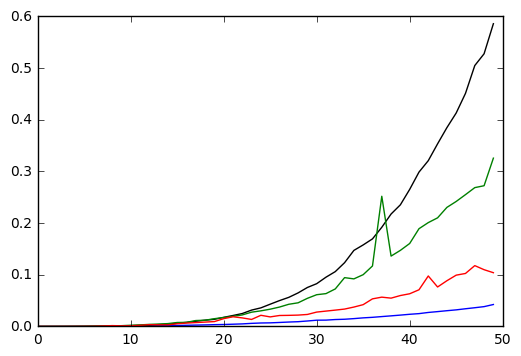

In [22]:
import pylab 
pylab.clf()
n=50
probabilidad=0.3
x = np.arange(n)
d = np.array(exper_Dijkstra(n)) 
bf = np.array(exper_BellmanFord(n))
bfs = np.array(exper_BFS(n)) 
fw = np.array(exper_FloydWarshall(n))
pylab.plot(x, d, 'b', x, bf, 'k', x, bfs,'g', x, fw, 'r')
pylab.show()

# 5. Comparación $\psi$ cercano a 1

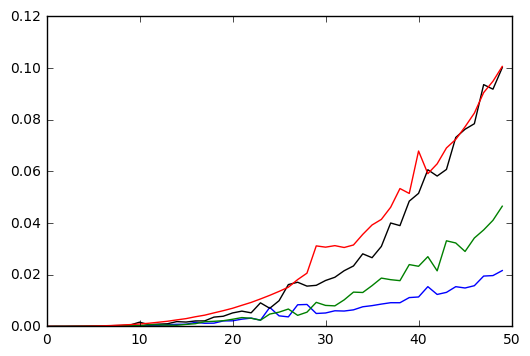

In [23]:
import pylab 
pylab.clf()
n=50
probabilidad=0.9
x = np.arange(n)
d = np.array(exper_Dijkstra(n)) 
bf = np.array(exper_BellmanFord(n))
bfs = np.array(exper_BFS(n)) 
fw = np.array(exper_FloydWarshall(n))
pylab.plot(x, d, 'b', x, bf, 'k', x, bfs,'g', x, fw, 'r')
pylab.show()